In [28]:
# Assumptions
# 1. The process is defined in [0,1].
# 2. The process accepts as input a float number.
import numpy as np
import scipy
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

W = np.load('exp-rw-1e8.npy')
NW = len(W)

In [29]:
def process(x: float) -> float:
    return 2*x

def ssrw_process(x:float) -> float:
    if x < 0: 
        raise ValueError('x must be in [0,1]')
    if x > 1:
        raise ValueError('x must be in [0,1]')
    x = x # fix zero devision
    return W[int(x*NW)-1]*(NW)**(-1/2)

def weierstrass(x,Nvar = 100):
    we=0
    for n in range(0,Nvar):
        we=we+np.cos(3**n*np.pi*x)/2**n
    return we

process = ssrw_process
# We use the weierstrass function as a test case.
# It is continuous, not differentiable, and does
# not have other properties of BM such as normality
# and memorylessness.

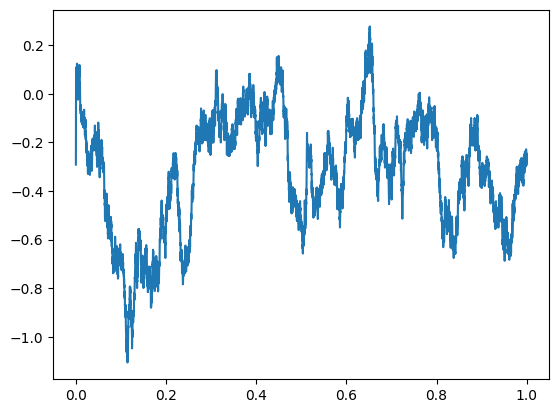

In [30]:
# Plot the process
x = np.linspace(0,1,10000)
y = np.vectorize(process)(x)
plt.plot(x,y)

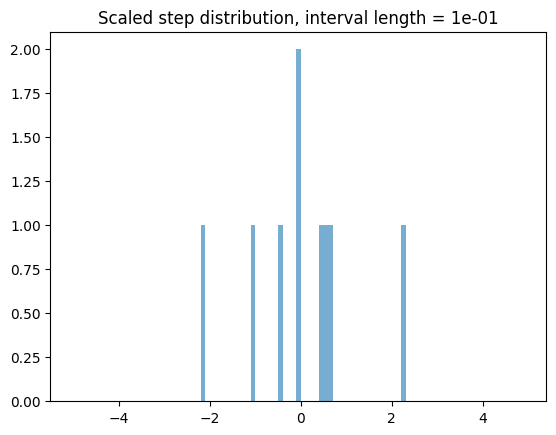

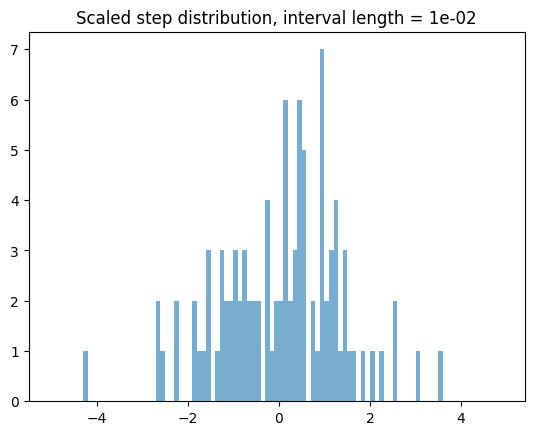

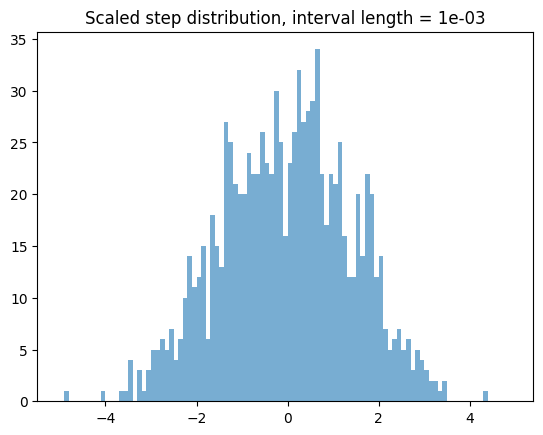

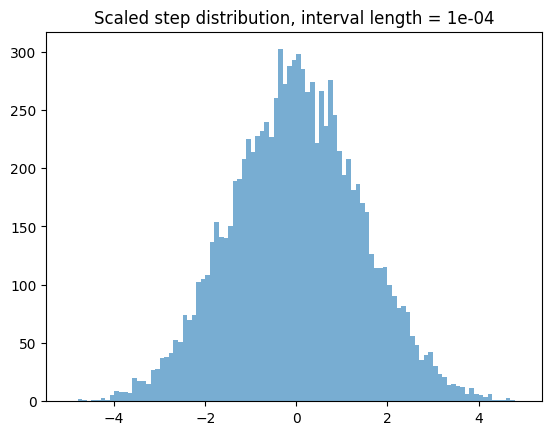

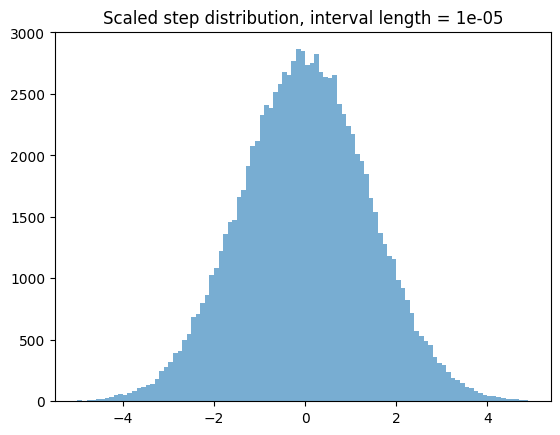

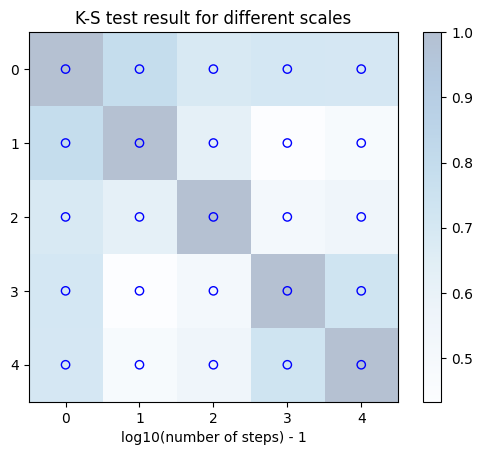

In [32]:
# heatmap for different scales
from scipy.stats import ks_2samp
def heatmap():
    n_scales = 5 # n_scales = k means we split into 10^(k+1) intervals
    samples = [np.diff(np.vectorize(process)(
        np.linspace(0,1,10**(i+1)))) / (10**(-i-1))**0.5 for i in range(n_scales)]
        # samples for different scales
    # plot histogram for each sample
    for i in range(n_scales):
        plt.hist(samples[i], alpha = 0.6, 
            # density = True,
            # bin length = 0.1
            bins = np.arange(-5,5,0.1),
            label = f'{10**(i+1):.0e} steps')
        # plt.xlim(-5,5)
        plt.title(f'Scaled step distribution, interval length = {10**(-i-1):.0e}')
        plt.show()
    # samples = [sample[1000:3000] if len(sample) > 5000 else sample for sample in samples]
    p_values = np.zeros((n_scales, n_scales))
    for i in range(n_scales):
        for j in range(n_scales):
            p_values[i,j] = ks_2samp(samples[i], samples[j])[1]
    plt.imshow(p_values, alpha=0.3)
    plt.colorbar()
    # blues color scheme
    plt.set_cmap('Blues')
    # put a cross on all pixels with p-value < 0.05, put a hollow circle otherwise
    for i in range(n_scales):
        for j in range(n_scales):
            if p_values[i,j] < 0.05:
                plt.scatter(i,j, marker = 'x', color = 'r')
            else:
                plt.scatter(i,j, marker = 'o', edgecolors = 'b', facecolors = 'none')
    plt.xlabel('log10(number of steps) - 1')
    plt.title(f'K-S test result for different scales')
    plt.show()
heatmap()